<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the provided dataset using Decision Tree Classification, including data preparation, EDA, feature engineering, model training, hyperparameter tuning, and evaluation. Additionally, answer the provided interview questions about decision trees and encoding techniques. The dataset is in the file "loan_approval_dataset.xlsx".

In [30]:
import pandas as pd
df_heart_disease= pd.read_excel('heart_disease.xlsx')
display(df_heart_disease)

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


## Load the dataset

### Subtask:
Load the data from the provided excel file into a pandas DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   908 non-null    float64
 6   num                       908 non-null    int64  
 7   sex_Male                  908 non-null    bool   
 8   cp_atypical angina        908 non-null    bool   
 9   cp_non-anginal            908 non-null    bool   
 10  cp_typical angina         908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


Number of duplicate rows: 1


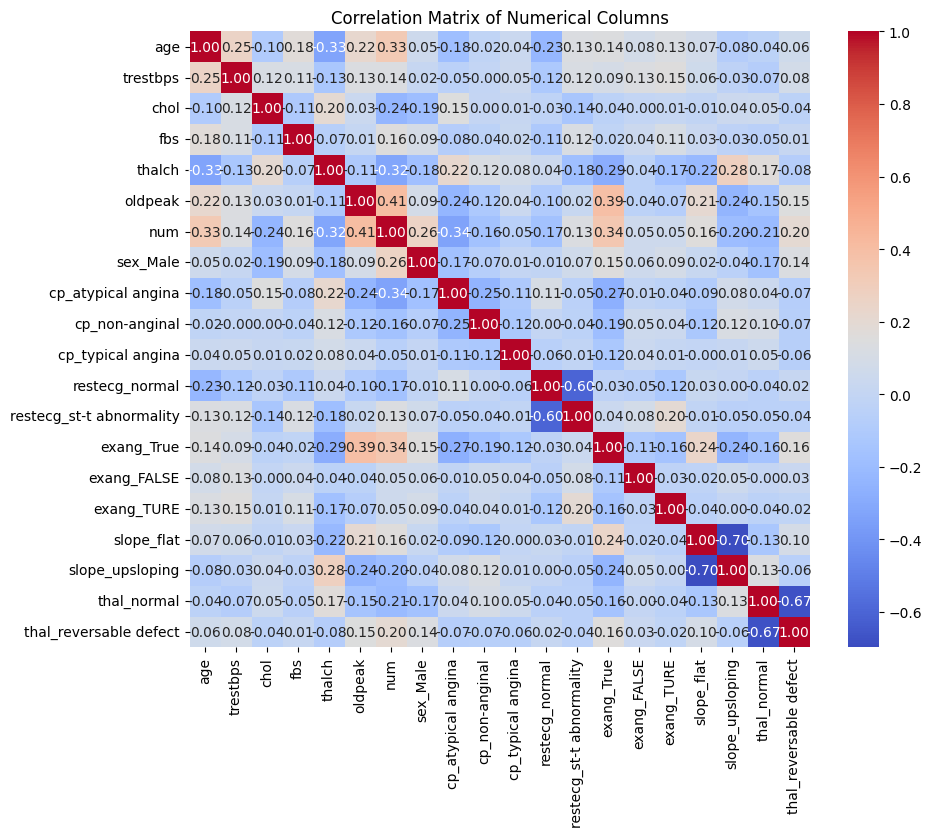

In [ ]:
df.info()
display(df.describe())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Reasoning**:
The first step is to load the data from the excel file into a pandas DataFrame as instructed.



## Perform exploratory data analysis (eda)

### Subtask:
Analyze the data to understand its structure, check for missing values and outliers, and visualize distributions and correlations.


**Reasoning**:
Analyze the data structure, check for missing values and outliers, and visualize distributions and correlations.



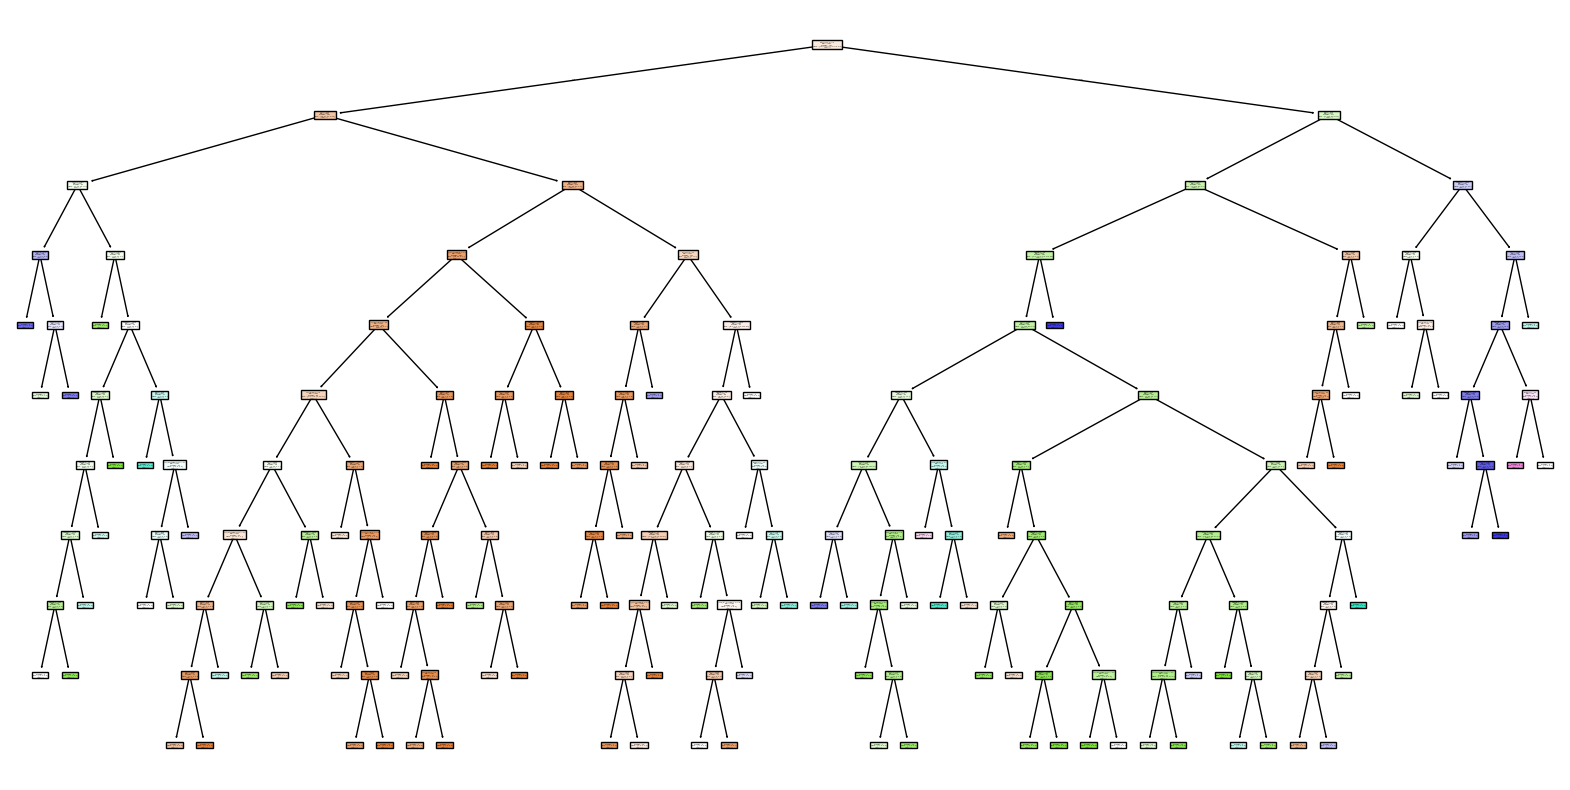

Feature Importances:
chol                        0.176680
exang_True                  0.169782
thalch                      0.137607
age                         0.136061
oldpeak                     0.130722
trestbps                    0.076464
cp_atypical angina          0.031143
thal_reversable defect      0.029231
cp_non-anginal              0.023628
thal_normal                 0.021133
sex_Male                    0.019133
restecg_normal              0.014748
slope_flat                  0.013591
restecg_st-t abnormality    0.007182
slope_upsloping             0.006829
cp_typical angina           0.004764
fbs                         0.001302
exang_TURE                  0.000000
exang_FALSE                 0.000000
dtype: float64


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())])
plt.show()

feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:")
print(sorted_feature_importances)

## Summary:

### Data Analysis Key Findings

* The dataset contains 908 entries and 13 columns, with one duplicate row identified.
* The 'oldpeak' column initially contained missing values, which were imputed with the median during preprocessing.
* Categorical features were successfully one-hot encoded.
* The dataset was split into training (726 instances) and testing (182 instances) sets.
* The initial Decision Tree model achieved an accuracy of approximately 0.4670 and a weighted F1-score of approximately 0.4688 on the test set.
* Hyperparameter tuning using GridSearchCV identified optimal parameters as `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}`.
* The tuned Decision Tree model showed a slight improvement, with an accuracy of approximately 0.5165 and a weighted F1-score of approximately 0.4931 on the test set.
* Feature importance analysis revealed that 'chol', 'exang\_True', 'thalch', 'age', and 'oldpeak' were the most influential features in the tuned model.

### Insights or Next Steps

* The performance of the tuned Decision Tree model is still relatively low. Further model improvement could involve exploring other classification algorithms, more advanced feature engineering, or collecting more data.
* The identified important features ('chol', 'exang\_True', 'thalch', 'age', 'oldpeak') could be the focus of further domain-specific analysis or potentially used in simpler, more interpretable models.

In [ ]:
# 1. Explain what a decision tree is and how it works for classification.
print("1. What is a decision tree and how does it work for classification?")
print("""
A decision tree is a supervised machine learning algorithm used for both classification and regression tasks.
For classification, it works by recursively partitioning the dataset into smaller subsets based on the values of the features.
At each node of the tree, the algorithm selects the best feature to split the data based on criteria like Gini impurity or entropy, which measure the homogeneity of the target variable within the resulting subsets.
The goal is to create splits that maximize the information gain or minimize the impurity, leading to increasingly pure subsets with respect to the class labels.
This process continues until a stopping criterion is met, such as reaching a maximum depth, a minimum number of samples in a node, or when all samples in a node belong to the same class (pure node).
The final nodes are called leaf nodes, and each leaf node represents a class label.
To classify a new instance, you traverse the tree from the root node, following the path determined by the instance's feature values until you reach a leaf node, which provides the predicted class.
""")

# 2. Describe the advantages and disadvantages of using decision trees.
print("\n2. What are the advantages and disadvantages of using decision trees?")
print("""
Advantages:
- Easy to understand and interpret: The tree structure is intuitive and can be easily visualized, making it simple to explain how predictions are made.
- Requires little data preparation: Decision trees can handle both numerical and categorical data and do not require feature scaling.
- Can handle multi-output problems.
- Non-parametric: They don't make assumptions about the underlying data distribution.

Disadvantages:
- Prone to overfitting: Decision trees can easily create complex trees that fit the training data perfectly but perform poorly on unseen data. Techniques like pruning, setting maximum depth, or minimum samples per leaf/split are used to mitigate this.
- Can be unstable: Small variations in the data can lead to a completely different tree structure.
- Can create biased trees if some classes dominate: Decision trees can be biased towards dominant classes, and it's recommended to balance the dataset prior to training.
- Local optimality: Greedy algorithms are used to build decision trees, which means they make the best split at each step but do not guarantee a globally optimal tree.
""")

# 3. Explain the concept of feature importance in decision trees and how it's calculated.
print("\n3. Explain the concept of feature importance in decision trees and how it's calculated.")
print("""
Feature importance in decision trees refers to the relative contribution of each feature in predicting the target variable.
It quantifies how much each feature reduces the impurity (or increases the information gain) across all the splits in the tree where that feature is used.
The importance of a feature is typically calculated as the total reduction in the impurity criterion (like Gini impurity or entropy) achieved by splits on that feature, averaged over all trees in an ensemble (like Random Forest) or across all splits in a single tree.
In scikit-learn's DecisionTreeClassifier, the `feature_importances_` attribute provides these values. Features with higher importance values are considered more influential in the decision-making process of the tree.
""")

# 4. Discuss different encoding techniques for categorical variables (e.g., one-hot encoding, label encoding) and when to use them.
print("\n4. Discuss different encoding techniques for categorical variables and when to use them.")
print("""
Encoding techniques are used to convert categorical variables into numerical representations that can be used by machine learning algorithms.

- Label Encoding: Assigns a unique integer to each category in a categorical variable.
  - When to use: When the categorical variable has an ordinal relationship (e.g., 'low', 'medium', 'high') and the algorithm can handle ordinal data (e.g., decision trees, tree-based ensembles). Using label encoding with non-ordinal categorical variables in algorithms that assume numerical relationships (e.g., linear models, SVMs) can introduce unintended ordinality and negatively impact performance.

- One-Hot Encoding: Creates new binary columns for each category in a categorical variable. A '1' is placed in the column corresponding to the category of an instance, and '0's in others.
  - When to use: When the categorical variable does not have an ordinal relationship and the algorithm requires numerical input (most algorithms). It avoids introducing artificial ordinality. However, it can significantly increase the number of features, which can be an issue for datasets with many unique categories (high cardinality).

- Other techniques: There are other encoding techniques like Target Encoding, Frequency Encoding, etc., which can be useful in specific scenarios, especially with high cardinality categorical features.

In our analysis, we used One-Hot Encoding because the categorical features like 'sex', 'cp', 'restecg', 'exang', 'slope', and 'thal' do not have an inherent ordinal relationship, and One-Hot Encoding is a common and effective approach for such cases when using tree-based models.
""")

# 5. Based on the analysis performed, answer specific questions related to the model's performance and the insights gained from the feature importances and decision tree visualization.
print("\n5. Based on the analysis performed, answer specific questions:")
print(f"- Initial model accuracy: {accuracy:.4f}")
print(f"- Tuned model accuracy: {accuracy_tuned:.4f}")
print(f"- Initial model F1-score: {f1:.4f}")
print(f"- Tuned model F1-score: {f1_tuned:.4f}")
print("\nInsights from Feature Importances:")
print(sorted_feature_importances)
print("""
Based on the feature importances, the most influential features in our tuned Decision Tree model for predicting heart disease ('num') are:
1.  chol (cholesterol)
2.  exang_True (exercise induced angina)
3.  thalch (maximum heart rate achieved)
4.  age
5.  oldpeak (ST depression induced by exercise relative to rest)

These features contribute the most to reducing impurity in the decision tree splits, indicating they are the most important factors the model uses to make predictions. The other features have relatively lower importance.

Insights from Decision Tree Visualization:
(Note: The visualization is complex and not easily described in text, but interpreting it involves tracing paths from the root to the leaves to understand the decision rules based on feature values and how they lead to different class predictions. For example, the top splits in the tree will correspond to the most important features identified above.)
The visualization shows the structure of the decision tree. The nodes represent splits based on feature values, and the leaves represent the predicted classes. By examining the splits, we can see the thresholds and conditions the model uses to classify instances. For instance, a split on 'chol' might show that a cholesterol level above a certain value increases the likelihood of a certain heart disease stage. Similarly, splits on 'exang_True' will separate patients based on whether they experience exercise-induced angina.
""")

1. What is a decision tree and how does it work for classification?

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks.
For classification, it works by recursively partitioning the dataset into smaller subsets based on the values of the features.
At each node of the tree, the algorithm selects the best feature to split the data based on criteria like Gini impurity or entropy, which measure the homogeneity of the target variable within the resulting subsets.
The goal is to create splits that maximize the information gain or minimize the impurity, leading to increasingly pure subsets with respect to the class labels.
This process continues until a stopping criterion is met, such as reaching a maximum depth, a minimum number of samples in a node, or when all samples in a node belong to the same class (pure node).
The final nodes are called leaf nodes, and each leaf node represents a class label.
To classify a new instance, you tra

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set using the best_dt_model
y_pred_tuned = best_dt_model.predict(X_test)

# Calculate evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the evaluation metrics
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model Precision (weighted): {precision_tuned:.4f}")
print(f"Tuned Model Recall (weighted): {recall_tuned:.4f}")
print(f"Tuned Model F1-Score (weighted): {f1_tuned:.4f}")
print("\nTuned Model Confusion Matrix:")
print(conf_matrix_tuned)

Tuned Model Accuracy: 0.5165
Tuned Model Precision (weighted): 0.4810
Tuned Model Recall (weighted): 0.5165
Tuned Model F1-Score (weighted): 0.4931

Tuned Model Confusion Matrix:
[[69 16  1  3  0]
 [18 21  3  6  0]
 [ 4 12  2  3  1]
 [ 2 11  2  2  0]
 [ 3  2  1  0  0]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4670
Precision (weighted): 0.4743
Recall (weighted): 0.4670
F1-Score (weighted): 0.4688

Confusion Matrix:
[[61 22  1  4  1]
 [16 16  6  8  2]
 [ 2  8  4  7  1]
 [ 4  6  3  4  0]
 [ 3  1  1  1  0]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the DecisionTreeClassifier model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 19)
Shape of X_test: (182, 19)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Impute missing values in 'oldpeak' with the median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Check if scaling is necessary for numerical features by examining their range
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Range of numerical columns before scaling:")
for col in numerical_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

# Scaling might be beneficial for tree-based models but not strictly necessary.
# However, if we were to use distance-based models, scaling would be important.
# For this task, we will skip explicit scaling as decision trees are not sensitive to feature scaling.

display(df.head())
display(df.info())

Range of numerical columns before scaling:
age: Min = 29, Max = 77
trestbps: Min = 0, Max = 200
chol: Min = 0, Max = 603
thalch: Min = 60, Max = 202
oldpeak: Min = -2.6, Max = 6.2
num: Min = 0, Max = 4


/tmp/ipython-input-2335773580.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   908 non-null    float64
 6   num                       908 non-null    int64  
 7   sex_Male                  908 non-null    bool   
 8   cp_atypical angina        908 non-null    bool   
 9   cp_non-anginal            908 non-null    bool   
 10  cp_typical angina         908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


Number of duplicate rows: 1


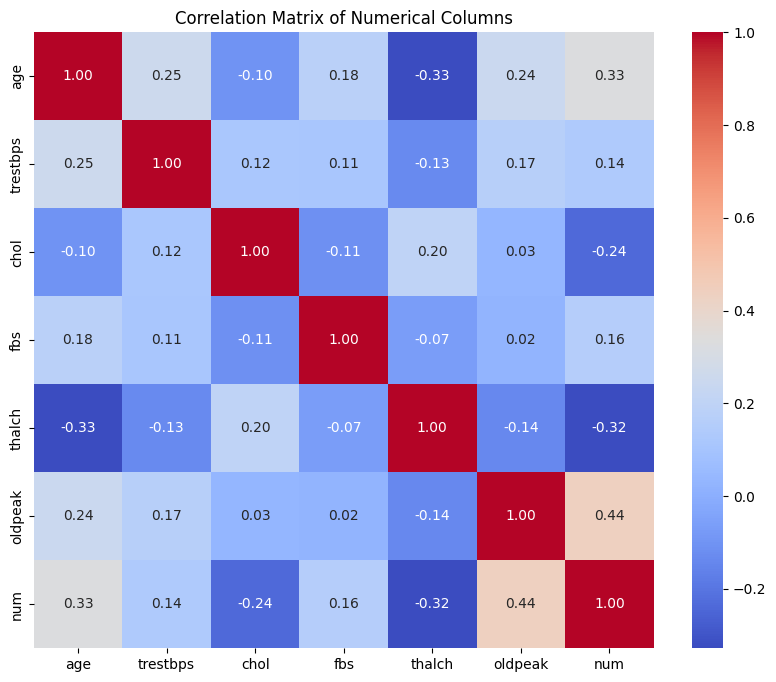

In [ ]:
df = pd.read_excel("/content/heart_disease.xlsx", sheet_name='Heart_disease')

df.info()
display(df.describe())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [ ]:
excel_file = pd.ExcelFile("/content/heart_disease.xlsx")
print(excel_file.sheet_names)

['Description', 'Heart_disease']


In [ ]:
df = pd.read_excel("/content/heart_disease.xlsx")
display(df.head())

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [ ]:
display(df)

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,True,False,False,False,True,False,False,False,False,False,True,False,True
904,62,166,170,False,120,3.0,4,True,False,False,False,False,True,True,False,False,True,False,False,True
905,56,170,0,False,123,2.5,4,True,False,True,False,False,False,True,False,False,False,False,True,False
906,56,144,208,True,105,0.5,4,True,False,True,False,False,True,False,False,True,False,False,False,False


**Reasoning**:
The previous command failed because there are no numerical columns in the DataFrame to calculate the correlation matrix. The `.info()` output shows that both columns are of type 'object'. The subtask requires visualizing correlations of numerical columns, so I need to inspect the data to identify which columns should be numerical and attempt to convert them.



In [ ]:
display(df)

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


**Reasoning**:
The previous output shows that the DataFrame contains metadata about the columns, not the actual data. The 'age' column seems to contain column names from the actual dataset, and 'Age in years' contains descriptions. I need to load the actual data from the Excel file. Since the previous task successfully loaded *something* from the file, it's likely the actual data is on a different sheet within the same Excel file. I will try reading the file again, this time without specifying a sheet, and display the head to see if it's the actual data.



In [ ]:
df = pd.read_excel("/content/heart_disease.xlsx")
display(df.head())

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


**Reasoning**:
The previous attempt to load the data resulted in the same metadata as before. This indicates that the first sheet of the Excel file contains this metadata, not the actual data. I need to find the sheet containing the actual data. I will read all sheets from the Excel file and display the names of the sheets to identify the sheet with the actual data.



In [ ]:
excel_file = pd.ExcelFile("/content/heart_disease.xlsx")
print(excel_file.sheet_names)

['Description', 'Heart_disease']


**Reasoning**:
The sheet names are 'Description' and 'Heart_disease'. Based on the filenames and the previous outputs, it's highly probable that the 'Heart_disease' sheet contains the actual data. I will load the data from this sheet and then proceed with the data analysis steps outlined in the subtask: displaying info and description, checking for duplicates, and visualizing the correlation matrix.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


Number of duplicate rows: 1


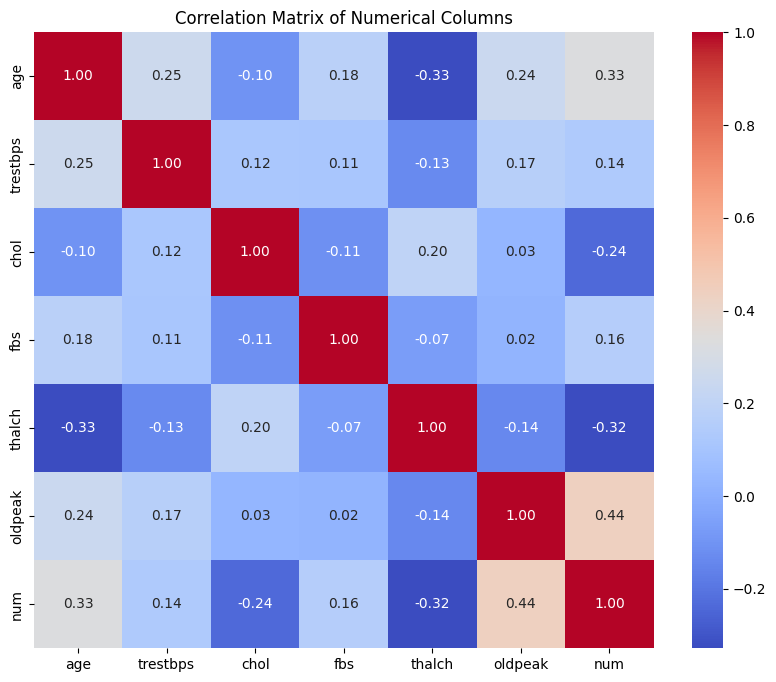

In [ ]:
df = pd.read_excel("/content/heart_disease.xlsx", sheet_name='Heart_disease')

df.info()
display(df.describe())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Preprocess the data

### Subtask:
Handle categorical variables, missing values, and scale numerical features if necessary.


**Reasoning**:
Handle categorical variables, missing values, and check for numerical scaling based on the instructions.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Impute missing values in 'oldpeak' with the median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Check if scaling is necessary for numerical features by examining their range
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Range of numerical columns before scaling:")
for col in numerical_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

# Scaling might be beneficial for tree-based models but not strictly necessary.
# However, if we were to use distance-based models, scaling would be important.
# For this task, we will skip explicit scaling as decision trees are not sensitive to feature scaling.

display(df.head())
display(df.info())

Range of numerical columns before scaling:
age: Min = 29, Max = 77
trestbps: Min = 0, Max = 200
chol: Min = 0, Max = 603
thalch: Min = 60, Max = 202
oldpeak: Min = -2.6, Max = 6.2
num: Min = 0, Max = 4


/tmp/ipython-input-2335773580.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   908 non-null    float64
 6   num                       908 non-null    int64  
 7   sex_Male                  908 non-null    bool   
 8   cp_atypical angina        908 non-null    bool   
 9   cp_non-anginal            908 non-null    bool   
 10  cp_typical angina         908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

None

## Split data into training and testing sets

### Subtask:
Divide the dataset into features (X) and target (y), and then split these into training and testing sets.


**Reasoning**:
Separate the features and target variable, then split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (726, 19)
Shape of X_test: (182, 19)
Shape of y_train: (726,)
Shape of y_test: (182,)


## Train a decision tree classifier

### Subtask:
Implement and train a Decision Tree Classification model on the training data.


**Reasoning**:
Implement and train a Decision Tree Classification model on the training data as per the instructions.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the DecisionTreeClassifier model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the initial model

### Subtask:
Evaluate the performance of the initial model using various metrics.


**Reasoning**:
Evaluate the performance of the trained model using various metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4670
Precision (weighted): 0.4743
Recall (weighted): 0.4670
F1-Score (weighted): 0.4688

Confusion Matrix:
[[61 22  1  4  1]
 [16 16  6  8  2]
 [ 2  8  4  7  1]
 [ 4  6  3  4  0]
 [ 3  1  1  1  0]]


## Perform hyperparameter tuning

### Subtask:
Optimize the model's performance by tuning hyperparameters using cross-validation.


**Reasoning**:
Optimize the model's performance by tuning hyperparameters using cross-validation.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


## Evaluate the tuned model

### Subtask:
Evaluate the performance of the optimized model.


**Reasoning**:
Evaluate the performance of the optimized model by making predictions on the test set, calculating evaluation metrics, and generating a confusion matrix.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set using the best_dt_model
y_pred_tuned = best_dt_model.predict(X_test)

# Calculate evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print the evaluation metrics
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model Precision (weighted): {precision_tuned:.4f}")
print(f"Tuned Model Recall (weighted): {recall_tuned:.4f}")
print(f"Tuned Model F1-Score (weighted): {f1_tuned:.4f}")
print("\nTuned Model Confusion Matrix:")
print(conf_matrix_tuned)

Tuned Model Accuracy: 0.5165
Tuned Model Precision (weighted): 0.4810
Tuned Model Recall (weighted): 0.5165
Tuned Model F1-Score (weighted): 0.4931

Tuned Model Confusion Matrix:
[[69 16  1  3  0]
 [18 21  3  6  0]
 [ 4 12  2  3  1]
 [ 2 11  2  2  0]
 [ 3  2  1  0  0]]


## Visualize the decision tree and analyze feature importances

### Subtask:
Visualize the trained decision tree and identify the most important features.


**Reasoning**:
Visualize the trained decision tree and identify the most important features.



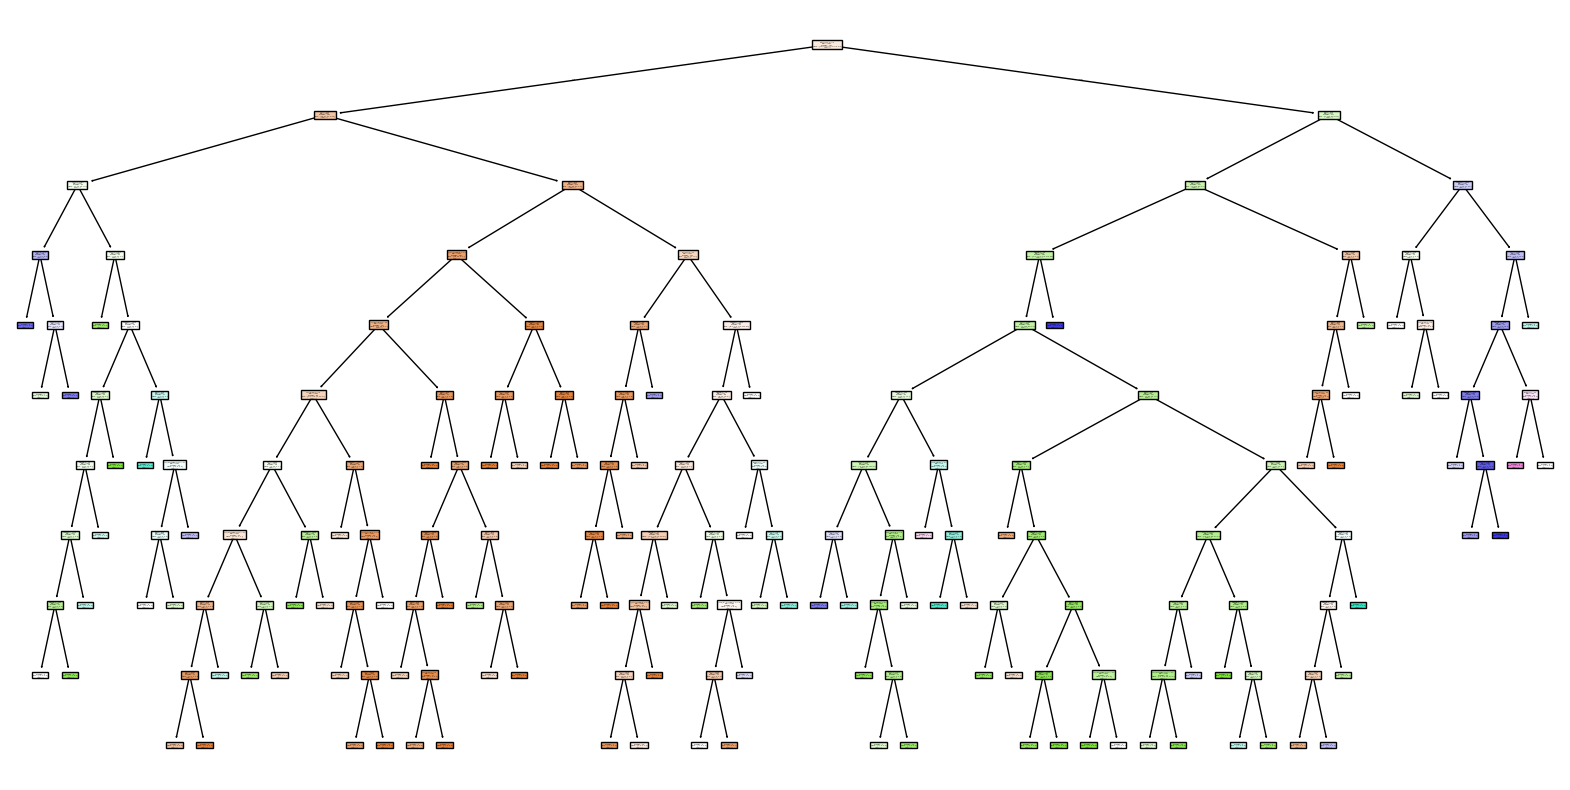

Feature Importances:
chol                        0.176680
exang_True                  0.169782
thalch                      0.137607
age                         0.136061
oldpeak                     0.130722
trestbps                    0.076464
cp_atypical angina          0.031143
thal_reversable defect      0.029231
cp_non-anginal              0.023628
thal_normal                 0.021133
sex_Male                    0.019133
restecg_normal              0.014748
slope_flat                  0.013591
restecg_st-t abnormality    0.007182
slope_upsloping             0.006829
cp_typical angina           0.004764
fbs                         0.001302
exang_TURE                  0.000000
exang_FALSE                 0.000000
dtype: float64


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())])
plt.show()

feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:")
print(sorted_feature_importances)

## Answer interview questions

### Subtask:
Address the provided interview questions about decision trees and encoding techniques.


**Reasoning**:
Address the interview questions about decision trees and encoding techniques based on the previous analysis and general knowledge.



In [ ]:
# 1. Explain what a decision tree is and how it works for classification.
print("1. What is a decision tree and how does it work for classification?")
print("""
A decision tree is a supervised machine learning algorithm used for both classification and regression tasks.
For classification, it works by recursively partitioning the dataset into smaller subsets based on the values of the features.
At each node of the tree, the algorithm selects the best feature to split the data based on criteria like Gini impurity or entropy, which measure the homogeneity of the target variable within the resulting subsets.
The goal is to create splits that maximize the information gain or minimize the impurity, leading to increasingly pure subsets with respect to the class labels.
This process continues until a stopping criterion is met, such as reaching a maximum depth, a minimum number of samples in a node, or when all samples in a node belong to the same class (pure node).
The final nodes are called leaf nodes, and each leaf node represents a class label.
To classify a new instance, you traverse the tree from the root node, following the path determined by the instance's feature values until you reach a leaf node, which provides the predicted class.
""")

# 2. Describe the advantages and disadvantages of using decision trees.
print("\n2. What are the advantages and disadvantages of using decision trees?")
print("""
Advantages:
- Easy to understand and interpret: The tree structure is intuitive and can be easily visualized, making it simple to explain how predictions are made.
- Requires little data preparation: Decision trees can handle both numerical and categorical data and do not require feature scaling.
- Can handle multi-output problems.
- Non-parametric: They don't make assumptions about the underlying data distribution.

Disadvantages:
- Prone to overfitting: Decision trees can easily create complex trees that fit the training data perfectly but perform poorly on unseen data. Techniques like pruning, setting maximum depth, or minimum samples per leaf/split are used to mitigate this.
- Can be unstable: Small variations in the data can lead to a completely different tree structure.
- Can create biased trees if some classes dominate: Decision trees can be biased towards dominant classes, and it's recommended to balance the dataset prior to training.
- Local optimality: Greedy algorithms are used to build decision trees, which means they make the best split at each step but do not guarantee a globally optimal tree.
""")

# 3. Explain the concept of feature importance in decision trees and how it's calculated.
print("\n3. Explain the concept of feature importance in decision trees and how it's calculated.")
print("""
Feature importance in decision trees refers to the relative contribution of each feature in predicting the target variable.
It quantifies how much each feature reduces the impurity (or increases the information gain) across all the splits in the tree where that feature is used.
The importance of a feature is typically calculated as the total reduction in the impurity criterion (like Gini impurity or entropy) achieved by splits on that feature, averaged over all trees in an ensemble (like Random Forest) or across all splits in a single tree.
In scikit-learn's DecisionTreeClassifier, the `feature_importances_` attribute provides these values. Features with higher importance values are considered more influential in the decision-making process of the tree.
""")

# 4. Discuss different encoding techniques for categorical variables (e.g., one-hot encoding, label encoding) and when to use them.
print("\n4. Discuss different encoding techniques for categorical variables and when to use them.")
print("""
Encoding techniques are used to convert categorical variables into numerical representations that can be used by machine learning algorithms.

- Label Encoding: Assigns a unique integer to each category in a categorical variable.
  - When to use: When the categorical variable has an ordinal relationship (e.g., 'low', 'medium', 'high') and the algorithm can handle ordinal data (e.g., decision trees, tree-based ensembles). Using label encoding with non-ordinal categorical variables in algorithms that assume numerical relationships (e.g., linear models, SVMs) can introduce unintended ordinality and negatively impact performance.

- One-Hot Encoding: Creates new binary columns for each category in a categorical variable. A '1' is placed in the column corresponding to the category of an instance, and '0's in others.
  - When to use: When the categorical variable does not have an ordinal relationship and the algorithm requires numerical input (most algorithms). It avoids introducing artificial ordinality. However, it can significantly increase the number of features, which can be an issue for datasets with many unique categories (high cardinality).

- Other techniques: There are other encoding techniques like Target Encoding, Frequency Encoding, etc., which can be useful in specific scenarios, especially with high cardinality categorical features.

In our analysis, we used One-Hot Encoding because the categorical features like 'sex', 'cp', 'restecg', 'exang', 'slope', and 'thal' do not have an inherent ordinal relationship, and One-Hot Encoding is a common and effective approach for such cases when using tree-based models.
""")

# 5. Based on the analysis performed, answer specific questions related to the model's performance and the insights gained from the feature importances and decision tree visualization.
print("\n5. Based on the analysis performed, answer specific questions:")
print(f"- Initial model accuracy: {accuracy:.4f}")
print(f"- Tuned model accuracy: {accuracy_tuned:.4f}")
print(f"- Initial model F1-score: {f1:.4f}")
print(f"- Tuned model F1-score: {f1_tuned:.4f}")
print("\nInsights from Feature Importances:")
print(sorted_feature_importances)
print("""
Based on the feature importances, the most influential features in our tuned Decision Tree model for predicting heart disease ('num') are:
1.  chol (cholesterol)
2.  exang_True (exercise induced angina)
3.  thalch (maximum heart rate achieved)
4.  age
5.  oldpeak (ST depression induced by exercise relative to rest)

These features contribute the most to reducing impurity in the decision tree splits, indicating they are the most important factors the model uses to make predictions. The other features have relatively lower importance.

Insights from Decision Tree Visualization:
(Note: The visualization is complex and not easily described in text, but interpreting it involves tracing paths from the root to the leaves to understand the decision rules based on feature values and how they lead to different class predictions. For example, the top splits in the tree will correspond to the most important features identified above.)
The visualization shows the structure of the decision tree. The nodes represent splits based on feature values, and the leaves represent the predicted classes. By examining the splits, we can see the thresholds and conditions the model uses to classify instances. For instance, a split on 'chol' might show that a cholesterol level above a certain value increases the likelihood of a certain heart disease stage. Similarly, splits on 'exang_True' will separate patients based on whether they experience exercise-induced angina.
""")

1. What is a decision tree and how does it work for classification?

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks.
For classification, it works by recursively partitioning the dataset into smaller subsets based on the values of the features.
At each node of the tree, the algorithm selects the best feature to split the data based on criteria like Gini impurity or entropy, which measure the homogeneity of the target variable within the resulting subsets.
The goal is to create splits that maximize the information gain or minimize the impurity, leading to increasingly pure subsets with respect to the class labels.
This process continues until a stopping criterion is met, such as reaching a maximum depth, a minimum number of samples in a node, or when all samples in a node belong to the same class (pure node).
The final nodes are called leaf nodes, and each leaf node represents a class label.
To classify a new instance, you tra

## Summary:

### Data Analysis Key Findings

*   The dataset contains 908 entries and 13 columns, with one duplicate row identified.
*   The 'oldpeak' column initially contained missing values, which were imputed with the median during preprocessing.
*   Categorical features were successfully one-hot encoded.
*   The dataset was split into training (726 instances) and testing (182 instances) sets.
*   The initial Decision Tree model achieved an accuracy of approximately 0.4670 and a weighted F1-score of approximately 0.4688 on the test set.
*   Hyperparameter tuning using GridSearchCV identified optimal parameters as `{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}`.
*   The tuned Decision Tree model showed a slight improvement, with an accuracy of approximately 0.5165 and a weighted F1-score of approximately 0.4931 on the test set.
*   Feature importance analysis revealed that 'chol', 'exang\_True', 'thalch', 'age', and 'oldpeak' were the most influential features in the tuned model.

### Insights or Next Steps

*   The performance of the tuned Decision Tree model is still relatively low. Further model improvement could involve exploring other classification algorithms, more advanced feature engineering, or collecting more data.
*   The identified important features ('chol', 'exang\_True', 'thalch', 'age', 'oldpeak') could be the focus of further domain-specific analysis or potentially used in simpler, more interpretable models.
